# Statistics: Mean

**The variables are as follows:**

Team

League

Year

Runs Scored (RS)

Runs Allowed (RA)

Wins (W)

On-Base Percentage (OBP)

Slugging Percentage (SLG)

Batting Average (BA)

Playoffs (binary)

RankSeason

RankPlayoffs

Games Played (G)

Opponent On-Base Percentage (OOBP)

Opponent Slugging Percentage (OSLG)

In [44]:
from sympy import symbols, Sum, IndexedBase
from sympy.abc import i, n
import seaborn as sns

# Define an indexed variable
x = IndexedBase('x')

# Define the expression for mean
expr = Sum(x[i], (i, 1, n)) / n

print(expr)

Sum(x[i], (i, 1, n))/n


In [3]:
import pandas as pd
data = pd.read_csv("C:\\Users\\Farzana Saif\\Downloads\\archive\\baseball.csv")
#print (data)
data
#data.shape

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [4]:
data.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

In [5]:
data.dtypes

Team             object
League           object
Year              int64
RS                int64
RA                int64
W                 int64
OBP             float64
SLG             float64
BA              float64
Playoffs          int64
RankSeason      float64
RankPlayoffs    float64
G                 int64
OOBP            float64
OSLG            float64
dtype: object

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1232.0,1988.957792,14.819625,1962.000,1976.750,1989.000,2002.000,2012.000
RS,1232.0,715.081981,91.534294,463.000,652.000,711.000,775.000,1009.000
RA,1232.0,715.081981,93.079933,472.000,649.750,709.000,774.250,1103.000
W,1232.0,80.904221,11.458139,40.000,73.000,81.000,89.000,116.000
OBP,1232.0,0.326331,0.015013,0.277,0.317,0.326,0.337,0.373
SLG,1232.0,0.397342,0.033267,0.301,0.375,0.396,0.421,0.491
BA,1232.0,0.259273,0.012907,0.214,0.251,0.260,0.268,0.294
Playoffs,1232.0,0.198052,0.398693,0.000,0.000,0.000,0.000,1.000
RankSeason,244.0,3.122951,1.738349,1.000,2.000,3.000,4.000,8.000
RankPlayoffs,244.0,2.717213,1.095234,1.000,2.000,3.000,4.000,5.000


In [7]:
#Simplest mean : Mean of any column

mean_RS= data['RS'].mean()
print(mean_RS)

715.0819805194806


In [8]:
#Or##
data.RS.mean()

np.float64(715.0819805194806)

In [9]:
#Mean : Mean of any column by any team

data.loc[data.Team == "ARI"]
data.loc[data.Team == "ARI"].RS.mean()

np.float64(742.2)

In [10]:
#Mean : Mean of any column by any team of any specific year

data.loc[(data.Team == "ARI") & (data.Year > 2009)].RS.mean()
data.loc[(data.Team == "ARI") & (data.Year.isin([2005, 2007, 2009]))].RS.mean()
data.loc[(data.Team == "ARI") & (data.Year.isin([2005, 2007, 2009]))]
data.loc[data.Team == "ARI"].sort_values(by="RS", ascending=False).iloc[0]
data.loc[data.Team == "ARI"].groupby("Year")["RS"].mean()
mean_rs = data.loc[data.Team == "ARI"].groupby("Year")["RS"].mean()
max_mean_year = mean_rs.idxmax()
print("Year:", max_mean_year, "Mean RS:", mean_rs[max_mean_year])

Year: 1999 Mean RS: 908.0


In [11]:
#Mean RA

data.RA.mean()
data.loc[data.Team == "CHC"].RA.mean()
data.loc[(data.Team == "CHC") & (data.Year <= 2007)].RA.mean()

np.float64(727.2619047619048)

In [12]:
data.RA.mean()


np.float64(715.0819805194806)

In [13]:
data.loc[data.Team == "CHC"].RA.mean()

np.float64(727.0212765957447)

In [14]:
data.loc[(data.Team == "CHC") & (data.Year <= 2007)]

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
154,CHC,NL,2007,752,690,85,0.333,0.422,0.271,1,5.0,4.0,162,0.322,0.399
184,CHC,NL,2006,716,834,66,0.319,0.422,0.268,0,NaN,NaN,162,0.342,0.431
214,CHC,NL,2005,703,714,79,0.324,0.440,0.270,0,NaN,NaN,162,0.325,0.407
245,CHC,NL,2004,789,665,89,0.328,0.458,0.268,0,NaN,NaN,162,0.321,0.395
275,CHC,NL,2003,724,683,88,0.323,0.416,0.259,1,7.0,3.0,162,0.324,0.372
305,CHC,NL,2002,706,759,67,0.321,0.413,0.246,0,NaN,NaN,162,0.331,0.407
335,CHC,NL,2001,777,701,88,0.336,0.430,0.261,0,NaN,NaN,162,0.321,0.398
365,CHC,NL,2000,764,904,65,0.335,0.411,0.256,0,NaN,NaN,162,0.348,0.452
395,CHC,NL,1999,747,920,67,0.329,0.420,0.257,0,NaN,NaN,162,0.346,0.467
425,CHC,NL,1998,831,792,90,0.337,0.433,0.264,1,6.0,4.0,163,NaN,NaN


# Median

**Mean and Median comparing first**

In [18]:
print(data.W.mean())
print(data.W.median())

80.90422077922078
81.0


Another way to show

In [19]:
print(data.W.mean())
data.W.median()

80.90422077922078


np.float64(81.0)

Exercise : Median of Wins of the Baltimore Team (BAL) until 2000

In [21]:
data.loc[(data.Team == "BAL") & (data.Year <= 2000)].W.median()

np.float64(89.0)

In [22]:
data.loc[(data.Team == "BAL") & (data.Year <= 2000)].W.mean()

np.float64(87.6)

# Mode

**Will check 3 statistics, Mean, Median and Mode : OBP(On Based Percentage)**

In [25]:
print(data.OBP.mean())
print(data.OBP.median())
print(data.OBP.mode())

0.32633116883116886
0.326
0    0.322
Name: OBP, dtype: float64


So Data is well distibuted

**Exercise: Mode of OBP During the year 2009**

In [31]:
data.loc[(data.Year == 2009)].OBP.mode()

0    0.318
1    0.332
Name: OBP, dtype: float64

In [32]:
data.loc[data.Year == 2009, "OBP"].value_counts()


OBP
0.332    3
0.318    3
0.343    2
0.339    2
0.352    1
0.324    1
0.329    1
0.331    1
0.340    1
0.319    1
0.350    1
0.346    1
0.341    1
0.345    1
0.335    1
0.362    1
0.328    1
0.334    1
0.321    1
0.314    1
0.309    1
0.320    1
0.333    1
0.337    1
Name: count, dtype: int64

In [33]:
data.loc[data.Year == 2009, "OBP"].value_counts().head()


OBP
0.332    3
0.318    3
0.343    2
0.339    2
0.352    1
Name: count, dtype: int64

In [39]:
data.loc[data.Year == 2009, "OBP"].value_counts().max()


np.int64(3)

In [37]:
vc = data.loc[data.Year == 2009, "OBP"].value_counts()
vc[vc == vc.max()]

OBP
0.332    3
0.318    3
Name: count, dtype: int64

# Correlation

Correlation: Measure the relationship strength between 2 varriables, here I will try to show Pearson Correlation.

Varries between 1 and -1

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$


In [ ]:
#Variables
df_correlation = data[["RS", "RA", "W"]]
df_correlation.head(1)

,RS,RA,W
0,734,688,81


In [43]:
#Correlation Matrix

df_correlation.corr()

,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


<Axes: >

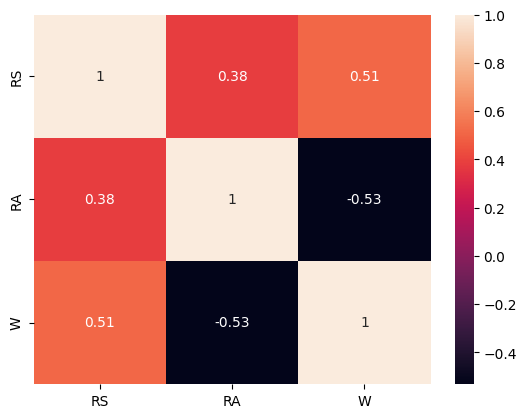

In [45]:
#Graph(Heatmap)
sns.heatmap(data = df_correlation.corr(), annot= True, fmt = '.2g')
